The updated strategy seeks to accelerate the cell segmentation-classification. It involves dividing the process into three phases. The initial phase entails rough segmentation and classification to generate a probability map, aiding in pinpointing the regions likely containing phenotype cells. The subsequent phase involves segmenting these areas with cellpose, while the final phase focuses on achieving high-precision segmentation using CNN. 
1)	Rough segmentation and classification \
b.	Crude Classification \
        i.	Split and label images \
        ii.	Bayes model training \
        iii.	Report: \
            1.	Kernel comparing between labels \
            2.	Confusion matrix and ROC curve \

<center>Display frames on original image</center>

In [1]:
'''
display running windows on input image
'''
from AIPyS.classification.bayes.GranularityDataGen import GranularityDataGen
import glob
from IPython.display import clear_output
data_dir = '/data/kanferg/Images/Pex_project/Subrah_2024/022419_catGFP/class1/'
files = glob.glob(data_dir + '*tif')
videoName = 'KernelLoss.avi'
Image_name = files[0]
outPath = '/data/kanferg/Images/Pex_project/Subrah_2024/data'
block_size_cyto = 3
offset_cyto = -5
global_ther = 0.51
clean  = 3
channel = 0
bit8 = 20
ci = 3
start_kernel = 2
end_karnel = 50 
kernel_size = 20
outputImageSize = 800

windowSize = 6 # for example split image to 6 slides
rnadomWindows = 10 # for example add 10 more random slides
kernelGran = 4 # The kernelGran is dictated by the GranularityVideo generated video file of Granularity process
w, h = 500, 500

# #loop over all the images:
ImageChankGen = GranularityDataGen(kernelGran, w, h, windowSize, rnadomWindows, Image_name,outPath,block_size_cyto, offset_cyto, global_ther, clean, channel, bit8, ci)
ImageChankGen.displayImageFrame()   

max image size: 1590, step size: 265


<center> i. Split and label images </center>

In [ ]:
# save image slices and two data tables: 
'''
imageseq_data.csv data table for labeling images
imageOrig_data.csv data table of the original image be used for normalization
'''
from AIPyS.classification.bayes.GranularityDataGen import GranularityDataGen
import glob
from IPython.display import clear_output
data_dir = '/data/kanferg/Images/Pex_project/Subrah_2024/022419_catGFP/class1/'
files = glob.glob(data_dir + '*tif')
videoName = 'KernelLoss.avi'
Image_name = files
outPath = '/data/kanferg/Images/Pex_project/Subrah_2024/022419_catGFP/single_images'
block_size_cyto = 3
offset_cyto = -5
global_ther = 0.51
clean  = 3
channel = 0
bit8 = 20
ci = 3
start_kernel = 2
end_karnel = 50 
kernel_size = 20
outputImageSize = 800

windowSize = 6 # for example split image to 6 slides
rnadomWindows = 10 # for example add 10 more random slides
kernelGran = 4 # The kernelGran is dictated by the GranularityVideo generated video file of Granularity process
w, h = 500, 500

# ImageChankGen = GranularityDataGen(kernelGran, w, h, windowSize,rnadomWindows, Image_name,outPath,block_size_cyto, offset_cyto, global_ther, clean, channel, bit8, ci)
# ImageChankGen.granCalc()

# #loop over all the images:
ImageChankGen = GranularityDataGen(kernelGran, w, h, windowSize,rnadomWindows, Image_name,outPath,block_size_cyto, offset_cyto, global_ther, clean, channel, bit8, ci)
ImageChankGen.granCalc_imageGen()   

The image sequences are stored and manually classified using the `Image_labeling` web application to create the training set. Phenotypic cells are labeled with the number 1, while normal (wild type) cells are categorized as 0.\
EDA will be carried out on the labeled image using the TableViz web application for visualizing images and measured values following data classification.

<center><h2>Unveiling the Significance Within Images Through Bayesian Insight</h2>

Leveraging the principles of Bayesian analysis, our goal is to construct a probabilistic model that enables us to quantify the likelihood that an observed image carries critical information. This analysis is predicated on a foundation established by prior training data, which encapsulates examples of images both with and without important content.

The essence of our method lies in applying Bayesian inference to evaluate and update our confidence regarding the presence of essential information in new, unseen images. Specifically, we start with a prior belief about the probability of any given image being significant based on our training dataset. Upon observing a new image, Bayesian analysis allows us to update this belief by calculating the posterior probability. This posterior probability reflects our updated confidence level, taking into account the specific characteristics of the newly observed image as evidence.

This approach distinguishes itself by its capacity to incrementally refine its assessments as more data becomes available. Each new observation contributes to a more nuanced understanding of what constitutes 'important' content within an image, thereby enhancing the predictive accuracy of our classification model.

By systematically quantifying the degree of certainty that an image is pertinent, our Bayesian classification framework offers a principled mechanism to sift through vast quantities of visual data. This serves to identify those images that merit further attention, grounded in a statistical foundation that optimizes for both precision and adaptability.


1. **Perform Pair Distribution Analysis**: Undertake a comprehensive analysis of pair distributions to identify patterns and correlations within the dataset. This preliminary step will provide foundational insights that will guide the construction of a robust model.

2. **Construct the Model**: Develop a predictive model by leveraging the insights gained from the pair distribution analysis. This will involve selecting appropriate algorithms and defining the architecture that best fits the project's objectives.

3. **Train the Model**: With the model constructed, proceed to the training phase using the designated training dataset. This process adjusts the model's parameters to minimize prediction error and improve accuracy.

4. **Validate the Model**: Following training, validate the model's performance by testing it against a separate validation dataset. This crucial step ensures the model's generalization capability and identifies any potential overfitting or underfitting.

5. **Deploy the Model**: Once the model has been rigorously trained and validated, finalize it for deployment. Deploy the model into a production environment where it can begin processing real-world data and delivering actionable insights.


Data is labeled using the dash app

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pymc as pm
print(pm.__version__)
import os
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import sys
import numpy as np

5.10.3


In [4]:
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89
az.rcParams["stats.ic_scale"] = "deviance"
az.rcParams["stats.information_criterion"] = "waic"
plt.rcParams["figure.figsize"] = (3.5, 2.5) # sinnle column
# #plt.rcParams["figure.figsize"] = (7, 4) # double-column 
sns.set_context("paper", font_scale=1.5)
#sns.set_palette("colorblind")
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['Times New Roman', 'serif']
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [5]:
df_label = pd.read_csv(os.path.join('AIPyS','imageseq_data.csv'))
df_label.sort_values('ratio')

,index,Unnamed: 0,name,ratio,intensity,sd,maskArea,label,signal_norm,sd_norm
676,676,897,uTSlUxF_44.png,0.0129,2734.2420,1105.5164,0.4982,1,1.144511,0.346802
655,655,305,dtynfbY_37.png,0.0129,1016.7194,913.5486,0.6892,1,1.117039,0.357555
43,43,52,TeOqHsT_28.png,0.0130,821.0573,708.2426,0.4989,1,0.662450,0.244352
444,444,830,AyPLOAj_14.png,0.0136,1117.5429,1063.2657,0.6977,1,1.099720,0.422405
1019,1019,56,TeOqHsT_39.png,0.0142,776.2349,655.8321,0.5059,1,0.626286,0.226270
...,...,...,...,...,...,...,...,...,...,...
684,684,879,uTSlUxF_11.png,0.0981,1033.1980,526.3105,0.4159,0,0.432481,0.165104
725,725,92,xJqflfc_17.png,0.0992,1416.5225,1478.4248,0.8203,0,0.778670,0.466078
441,441,808,fIpxGin_35.png,0.0994,1226.0496,979.3900,0.5037,0,0.553934,0.311131
14,14,1000,JDdhJkT_17.png,0.1019,1392.4448,1433.6786,0.6111,0,0.730176,0.447373


In [6]:
# same amount of wt(0) vs pheno(1)
OneNum = len(df_label.loc[df_label["label"]==1])
ind_pheno_list = df_label.loc[df_label["label"]==1,:].index.to_list()
ind_WT_list = df_label.loc[df_label["label"]==0,:].index.to_list()
import random
random.shuffle(ind_WT_list)
ind_WT_list_sel= [ind_WT_list[i] for i in range(OneNum)]
df_label = df_label.iloc[ind_WT_list_sel+ind_pheno_list,:]

In [7]:
df_label_pair = df_label.iloc[:,[3,6,7,8,9]]
#df_label_pair = df_label.iloc[:,[3,4,5,6,7]]
label_map = {0: "WT", 1: "Pheno"}
# Apply the mapping to the "label" column
df_label_pair['label'] = df_label_pair['label'].map(label_map)

/tmp/ipykernel_2733210/1744707402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_pair['label'] = df_label_pair['label'].map(label_map)


In [8]:
palette1 = sns.color_palette("colorblind",4)
custom_palette = {"WT": palette1[2], "Pheno": palette1[3]}
custom_palette

{'WT': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 'Pheno': (0.8352941176470589, 0.3686274509803922, 0.0)}

<center>Perform Pair Distribution Analysis</center>

/gpfs/gsfs10/users/kanferg/conda/envs/cellpose_utsw/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


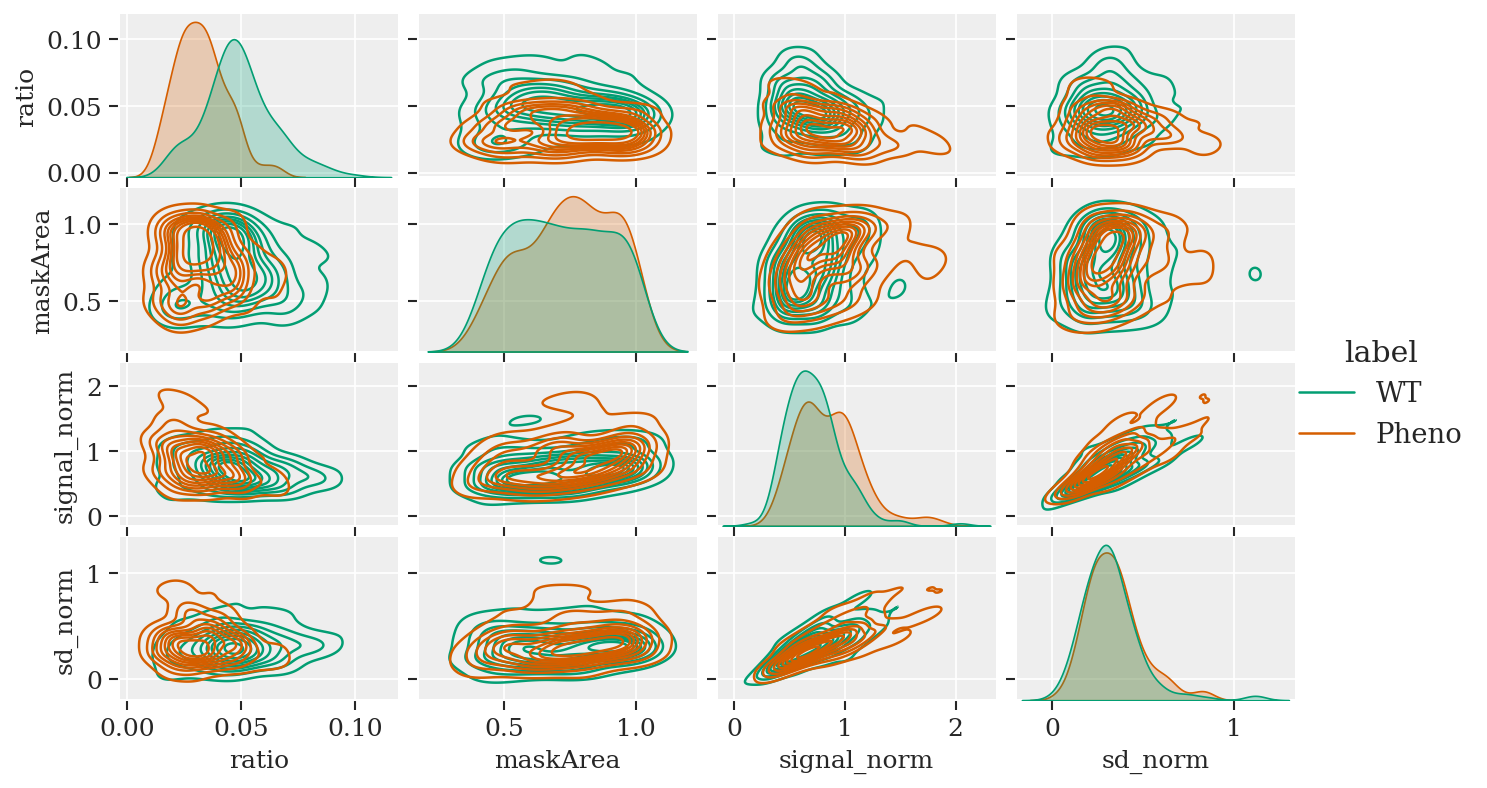

In [9]:
plt.rcParams["figure.figsize"] = (5, 2.5)
g = sns.pairplot(df_label_pair, hue="label",kind="kde",palette=custom_palette)
g.fig.set_size_inches(10, 5)  # Width, height in inches

# Show the plot
plt.show()

<center>Construct the Model

From the Pair Distribution Analysis, it is evident that the measurement of the decay parameter (ratio) has the most significant influence on distinguishing between these binary signals. The impact of other variables is minimal.

n the context of the sigmoid function, $\sigma(\mu) = \frac{1}{1 + e^{-\mu}}$, the parameter $\mu$ (often the result of a linear combination of input features in machine learning models) plays a crucial role in determining the output of the function. Here's how large or small values of $\mu$ influence the sigmoid function's output:

1. **Large $\mu$**: As $\mu$ becomes large and positive, $e^{-\mu}$ approaches 0 because the exponentiation of a large negative number approaches zero. This means the denominator of the sigmoid function approaches 1, making the whole expression approach 1. In the context of logistic regression or neural networks, this implies a high confidence in the positive class, with the output probability nearing 100% (but never exactly 1 due to the asymptotic nature of the function).

2. **Small $\mu$**: Conversely, as $\mu$ becomes large and negative, $e^{-\mu}$ grows large because exponentiation of a large positive number becomes very large. Therefore, the denominator $1 + e^{-\mu}$ becomes large, pushing the value of the sigmoid function towards 0. This represents a high confidence in the negative class, with the output probability nearing 0%.

3. **$\mu$ Near 0**: When $\mu$ is close to 0, $e^{-\mu}$ is close to 1, making the denominator of the sigmoid function tend towards 2, which gives the sigmoid function a value of about 0.5. This represents uncertainty between the classes, indicating that the model does not strongly favor the positive or the negative class - essentially a 50-50 or "coin flip" probability.

In summary, the value of $\mu$ directly influences the output of the sigmoid function, shifting the model's predicted probability from strong confidence in one class to strong confidence in the other, passing through a point of maximum uncertainty at $\mu = 0$. This transition captures the essence of logistic regression and similar models' ability to classify observations based on their predicted probabilities.

In [100]:
def testFormula(r,a,b):
    mu = a + r*b
    theta = mu/(1+np.exp(-mu))
    return mu

In [103]:
n = 100
r = np.linspace(0.01, 0.1, n)
a = np.random.normal(0,2,n)
b = np.random.normal(0,2,n)
e = np.zeros((n,2))
e[:,0] = a
e[:,1] = b

Text(0.5, 1.0, 'ratio')

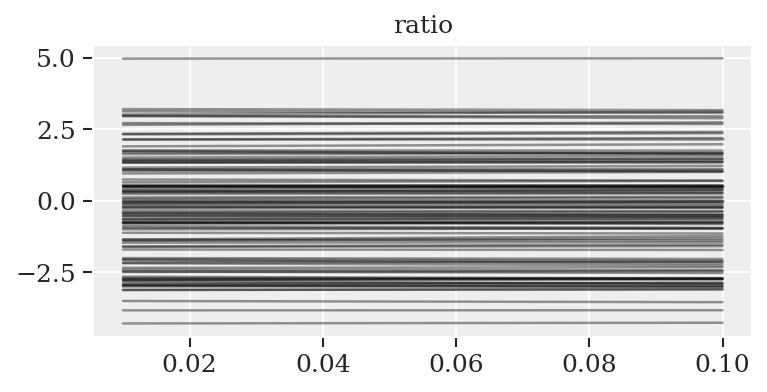

In [104]:
plt.rcParams["figure.figsize"] = (5, 2.5)
fig, axes = plt.subplots(1, 1)
for arr in e:
    axes.plot(r,testFormula(r,a = arr[0],b = arr[1]) , "k", alpha=0.4)
axes.set_title('ratio')

<center><H2>Bayes model training</H2>

5.10.3


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b]


Sampling 4 chains for 4_000 tune and 4_000 draw iterations (16_000 + 16_000 draws total) took 14 seconds.


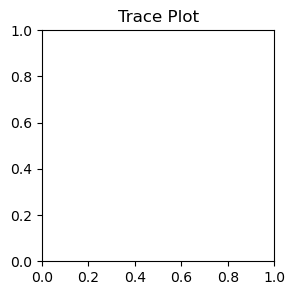

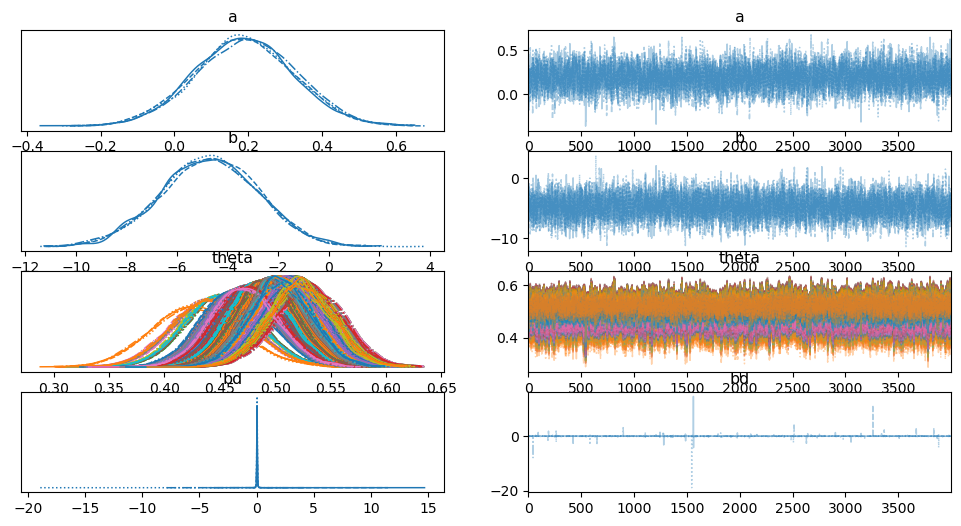

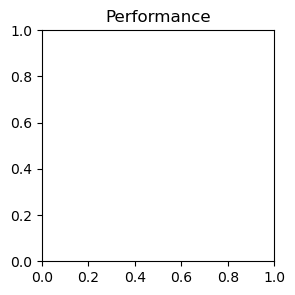

In [1]:
from AIPyS.classification.bayes.TrainBayesImageSplit import TrainBayesImageSplit
trainObj = TrainBayesImageSplit(dataFileName='imageseq_data.csv',dataPath = 'data',outPath = 'data')
# create a pair distribution report in a pdf file
#trainObj.pairDistribution()
# trainingmodel and create a training report
trainObj.bayesModelTraining()